# Deep Feed-Forward Neural Network (DFNN) for Regression
## Seoul Bike Sharing Demand Prediction
**Code written by Seetha Parameswaran**

---

## Overview

This exercise demonstrates the implementation of a **Deep Feed-Forward Neural Network (DFNN)** for regression tasks. We apply this model to the Seoul Bike Sharing dataset to predict hourly bike rental demand based on weather conditions and temporal features. This is a practical smart city application for urban mobility planning and resource optimization.

### Deep Feed-Forward Neural Network (DFNN)

A DFNN is a multi-layer neural network where information flows forward from input to output through one or more hidden layers with non-linear activations. The model consists of:

- **Input layer**: Feature vector with $d$ features
- **Hidden layers**: $L-1$ layers with non-linear activations (ReLU)
- **Output layer**: Single neuron with identity activation (for regression)
- **Non-linearity**: Essential for learning complex patterns
- **Backpropagation**: Efficient gradient computation using chain rule

This architecture enables learning hierarchical representations and can approximate complex non-linear functions.

---

## Learning Outcomes

By completing this exercise, you will:

✓ Implement DFNN from scratch with multiple hidden layers  
✓ Understand forward propagation through deep networks  
✓ Apply backpropagation algorithm for gradient computation  
✓ Implement mini-batch SGD optimization  
✓ Use ReLU activation for hidden layers  
✓ Apply Mean Squared Error (MSE) loss for regression  
✓ Initialize parameters using He initialization  
✓ Implement early stopping to prevent overfitting  
✓ Evaluate regression models with multiple metrics  
✓ Apply DFNN to real-world smart city problem  

---



## Methodology

The general methodology to build this regression model:

### 1. **Load and preprocess data**
   - Load Seoul Bike Sharing dataset (8,760 samples, 17 features, continuous target)
   - Split into training/validation/test sets (90%/5%/5%)
   - Encode categorical variables (one-hot encoding for seasons, binary for holiday)
   - Feature scaling: Standardize features using $z$-score normalization

### 2. **Define the network architecture**
   - Input layer: 17 features (weather + temporal)
   - Hidden layer 1: 64 neurons, ReLU activation
   - Hidden layer 2: 32 neurons, ReLU activation
   - Hidden layer 3: 16 neurons, ReLU activation
   - Output layer: 1 neuron, Identity activation
   - Total architecture: $[17, 64, 32, 16, 1]$

### 3. **Initialize parameters**
   - Weights: He initialization $\mathbf{W}^{(\ell)} \sim \mathcal{N}(0, \sqrt{2/n_{\ell-1}})$
   - Biases: Zero initialization $\mathbf{b}^{(\ell)} = \mathbf{0}$

### 4. **Training loop (Mini-batch SGD)**
   - **Shuffle** training data at each epoch
   - **Create mini-batches** of size $B = 64$
   - For each mini-batch:
     - **Forward propagation**: Compute predictions through all layers
     - **Compute loss**: MSE on mini-batch
     - **Backward propagation**: Compute gradients via backpropagation
     - **Update parameters**: Apply gradient descent
   - **Validation**: Compute validation loss after each epoch
   - **Early stopping**: Stop if validation loss doesn't improve for 15 epochs
   - Repeat for maximum 100 epochs

### 5. **Make predictions**
   - Forward pass through trained network
   - Inverse transform to original scale
   - Output: Predicted bike rental count

### 6. **Evaluate the model**
   - **Mean Squared Error (MSE)**: $\frac{1}{N}\sum_{i=1}^N(y^{(i)} - \hat{y}^{(i)})^2$
   - **Root Mean Squared Error (RMSE)**: $\sqrt{\text{MSE}}$
   - **Mean Absolute Error (MAE)**: $\frac{1}{N}\sum_{i=1}^N|y^{(i)} - \hat{y}^{(i)}|$
   - **R² Score**: $1 - \frac{\sum(y - \hat{y})^2}{\sum(y - \bar{y})^2}$

### 7. **Visualize results**
   - Training and validation loss curves
   - Predictions vs actual values scatter plot
   - Residual plot
   - Sample predictions comparison

---

## Dataset Information

**Name:** Seoul Bike Sharing Demand  
**Source:** UCI Machine Learning Repository  
**Samples:** 8,760 (365 days × 24 hours)  
**Time Period:** December 2017 - November 2018  

### Features (17 total after encoding):

| Feature Category | Features | Type |
|-----------------|----------|------|
| **Temporal** | Hour (0-23) | Continuous |
| **Weather - Temperature** | Temperature (°C), Dew point (°C) | Continuous |
| **Weather - Humidity** | Humidity (%) | Continuous |
| **Weather - Wind** | Wind speed (m/s) | Continuous |
| **Weather - Visibility** | Visibility (10m units) | Continuous |
| **Weather - Solar** | Solar Radiation (MJ/m²) | Continuous |
| **Weather - Precipitation** | Rainfall (mm), Snowfall (cm) | Continuous |
| **Seasonal** | Season_Autumn, Season_Spring, Season_Summer, Season_Winter | Binary (one-hot) |
| **Calendar** | Holiday (0/1) | Binary |
| **Operational** | Functioning Day (0/1) | Binary |

### Target Variable:

**Rented Bike Count**: Number of bikes rented per hour (continuous)
- Range: 0 - 3,556 bikes
- Mean: ~704 bikes/hour
- Std: ~644 bikes/hour

### Task: 
**Regression** - Predict continuous bike rental demand

### Smart City Application:
- **Dynamic resource allocation**: Redistribute bikes based on predicted demand
- **Maintenance scheduling**: Plan service during low-demand periods
- **Urban mobility planning**: Integrate with public transport systems
- **Sustainability**: Reduce carbon emissions by optimizing bike-sharing

---

## Network Architecture Details

### Layer-by-Layer Configuration:

```
Input Layer:        17 features
                     ↓ (W^(1): 17×64, b^(1): 64)
Hidden Layer 1:     64 neurons + ReLU
                     ↓ (W^(2): 64×32, b^(2): 32)
Hidden Layer 2:     32 neurons + ReLU
                     ↓ (W^(3): 32×16, b^(3): 16)
Hidden Layer 3:     16 neurons + ReLU
                     ↓ (W^(4): 16×1, b^(4): 1)
Output Layer:       1 neuron + Identity
                     ↓
Prediction:         Bike count (continuous)
```

### Total Parameters:
- Layer 1: $17 \times 64 + 64 = 1,152$
- Layer 2: $64 \times 32 + 32 = 2,080$
- Layer 3: $32 \times 16 + 16 = 528$
- Layer 4: $16 \times 1 + 1 = 17$
- **Total: 3,777 parameters**

### Why This Architecture?

1. **Progressive dimensionality reduction**: 17 → 64 → 32 → 16 → 1 (funnel architecture)
2. **Sufficient capacity**: Multiple hidden layers can learn complex patterns in weather-demand relationships
3. **Manageable size**: Not too large to overfit on 7,884 training samples
4. **Hierarchical learning**: 
   - Layer 1: Low-level weather feature combinations
   - Layer 2: Mid-level temporal-weather patterns
   - Layer 3: High-level demand patterns
   - Layer 4: Final prediction synthesis

---

## Training Configuration

| Hyperparameter | Value | Justification |
|----------------|-------|---------------|
| **Learning Rate** | $\eta = 0.001$ | Small enough for stable convergence |
| **Batch Size** | $B = 64$ | Balances gradient stability and speed |
| **Epochs** | $T = 100$ | With early stopping |
| **Early Stopping Patience** | 15 epochs | Prevents overfitting |
| **Optimizer** | Vanilla SGD | Pure mini-batch gradient descent |
| **Initialization** | He (for ReLU) | Prevents vanishing/exploding gradients |
| **Loss Function** | MSE | Standard for regression |
| **Data Split** | 90/5/5 | Train/Val/Test |

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("=" * 80)
print("DFNN Implementation for Seoul Bike Sharing Demand Prediction")
print("=" * 80)

DFNN Implementation for Seoul Bike Sharing Demand Prediction


In [3]:
# ============================================================================
# STEP 1: LOAD AND EXPLORE DATASET
# ============================================================================

# Load dataset
# Note: Download from UCI or Kaggle first
# URL: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

try:
    df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')
    print("\n✓ Dataset loaded successfully!")
except FileNotFoundError:
    print("\n⚠ Dataset not found. Please download from:")
    print("https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand")
    print("Save as 'SeoulBikeData.csv' in the same directory.")
    raise

# Display basic information
print("\n" + "=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1} (excluding target)")

print("\nFirst 5 rows:")
print(df.head())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())


✓ Dataset loaded successfully!

DATASET OVERVIEW

Dataset Shape: (8760, 14)
Number of samples: 8760
Number of features: 13 (excluding target)

First 5 rows:
         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   



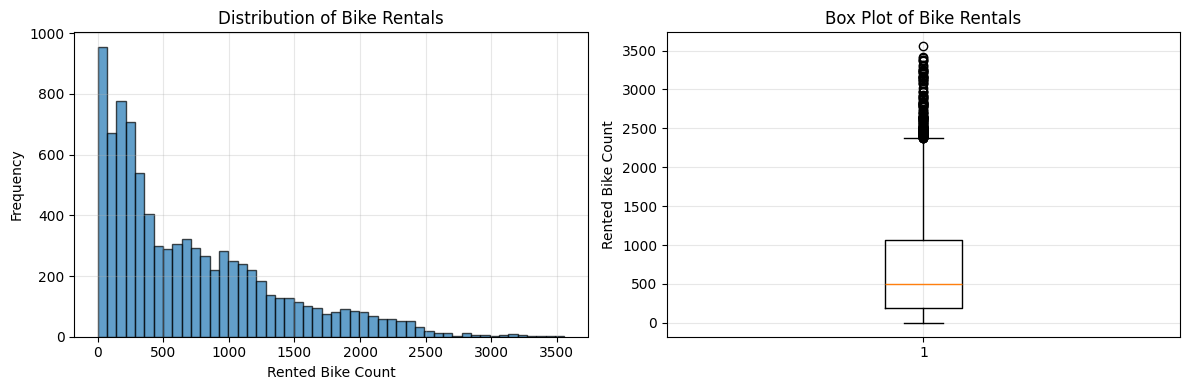


Target Variable Statistics:
Mean: 704.60
Std: 645.00
Min: 0.00
Max: 3556.00


In [4]:
# Visualize target variable distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Rented Bike Count'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title('Distribution of Bike Rentals')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['Rented Bike Count'])
plt.ylabel('Rented Bike Count')
plt.title('Box Plot of Bike Rentals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTarget Variable Statistics:")
print(f"Mean: {df['Rented Bike Count'].mean():.2f}")
print(f"Std: {df['Rented Bike Count'].std():.2f}")
print(f"Min: {df['Rented Bike Count'].min():.2f}")
print(f"Max: {df['Rented Bike Count'].max():.2f}")

In [5]:
# ============================================================================
# STEP 2: DATA PREPROCESSING
# ============================================================================

print("\n" + "=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# Make a copy
data = df.copy()

# Extract target variable
y = data['Rented Bike Count'].values.reshape(-1, 1)
print(f"\nTarget shape: {y.shape}")

# Drop target and date columns
data = data.drop(['Rented Bike Count', 'Date'], axis=1)

# Encode categorical variables
print("\nEncoding categorical variables...")

# Seasons: One-hot encoding
seasons_dummies = pd.get_dummies(data['Seasons'], prefix='Season')
data = pd.concat([data, seasons_dummies], axis=1)
data = data.drop('Seasons', axis=1)

# Holiday: Binary encoding (0 = No Holiday, 1 = Holiday)
data['Holiday'] = data['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Functioning Day: Binary encoding (0 = No, 1 = Yes)
data['Functioning Day'] = data['Functioning Day'].map({'No': 0, 'Yes': 1})

print(f"Features after encoding: {data.shape[1]}")
print(f"Feature names: {data.columns.tolist()}")

# Convert to numpy array
X = data.values
print(f"\nInput features shape: {X.shape}")
print(f"Target shape: {y.shape}")


DATA PREPROCESSING

Target shape: (8760, 1)

Encoding categorical variables...
Features after encoding: 15
Feature names: ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter']

Input features shape: (8760, 15)
Target shape: (8760, 1)


In [6]:
# ============================================================================
# SPLIT DATA: Train/Validation/Test = 90/5/5
# ============================================================================

print("\n" + "=" * 80)
print("DATA SPLITTING")
print("=" * 80)

# First split: 90% train, 10% temp (for val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.10, random_state=42, shuffle=True
)

# Second split: Split temp into 50% validation, 50% test (5% and 5% of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, shuffle=True
)

print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

# ============================================================================
# FEATURE STANDARDIZATION
# ============================================================================

print("\n" + "=" * 80)
print("FEATURE STANDARDIZATION")
print("=" * 80)

# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features standardized: x' = (x - μ) / σ")
print(f"Training set mean: {X_train_scaled.mean():.6f}")
print(f"Training set std: {X_train_scaled.std():.6f}")

# Also scale target for better training (optional but recommended)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)

print(f"\nTarget also standardized for better optimization")
print(f"Original target range: [{y_train.min():.2f}, {y_train.max():.2f}]")
print(f"Scaled target range: [{y_train_scaled.min():.2f}, {y_train_scaled.max():.2f}]")


DATA SPLITTING

Training set: 7884 samples (90.0%)
Validation set: 438 samples (5.0%)
Test set: 438 samples (5.0%)

FEATURE STANDARDIZATION

✓ Features standardized: x' = (x - μ) / σ
Training set mean: -0.000000
Training set std: 1.000000

Target also standardized for better optimization
Original target range: [0.00, 3418.00]
Scaled target range: [-1.09, 4.21]


In [7]:
# ============================================================================
# STEP 3: ACTIVATION FUNCTIONS AND DERIVATIVES
# ============================================================================

print("\n" + "=" * 80)
print("ACTIVATION FUNCTIONS")
print("=" * 80)

class ActivationFunctions:
    """
    Activation functions and their derivatives for DFNN
    """
    
    @staticmethod
    def relu(Z):
        """
        ReLU activation: f(z) = max(0, z)
        
        Args:
            Z: Pre-activation values (any shape)
        Returns:
            Activated values (same shape as Z)
        """
        return np.maximum(0, Z)
    
    @staticmethod
    def relu_derivative(Z):
        """
        ReLU derivative: f'(z) = 1 if z > 0, else 0
        
        Args:
            Z: Pre-activation values (any shape)
        Returns:
            Derivative values (same shape as Z)
        """
        return (Z > 0).astype(float)
    
    @staticmethod
    def identity(Z):
        """
        Identity activation: f(z) = z
        Used for regression output layer
        
        Args:
            Z: Pre-activation values (any shape)
        Returns:
            Same as input
        """
        return Z
    
    @staticmethod
    def identity_derivative(Z):
        """
        Identity derivative: f'(z) = 1
        
        Args:
            Z: Pre-activation values (any shape)
        Returns:
            Ones with same shape as Z
        """
        return np.ones_like(Z)

print("\n✓ Activation functions defined:")
print("  - ReLU for hidden layers: f(z) = max(0, z)")
print("  - Identity for output layer: f(z) = z")


ACTIVATION FUNCTIONS

✓ Activation functions defined:
  - ReLU for hidden layers: f(z) = max(0, z)
  - Identity for output layer: f(z) = z


In [9]:

# ============================================================================
# STEP 4: DEEP FEED-FORWARD NEURAL NETWORK CLASS
# ============================================================================

print("\n" + "=" * 80)
print("DFNN CLASS IMPLEMENTATION")
print("=" * 80)

class DFNN:
    """
    Deep Feed-Forward Neural Network for Regression
    Implements mini-batch SGD with backpropagation
    """
    
    def __init__(self, architecture, learning_rate=0.001, batch_size=64, 
                 epochs=100, patience=10, verbose=True):
        """
        Initialize DFNN
        
        Args:
            architecture: List of layer sizes [input_dim, hidden1, hidden2, ..., output_dim]
            learning_rate: Learning rate η for SGD
            batch_size: Mini-batch size B
            epochs: Number of training epochs
            patience: Early stopping patience
            verbose: Print training progress
        """
        self.architecture = architecture
        self.num_layers = len(architecture) - 1  # Exclude input layer
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.patience = patience
        self.verbose = verbose
        
        # Initialize parameters
        self.parameters = {}
        self.initialize_parameters()
        
        # Training history
        self.history = {
            'train_loss': [],
            'val_loss': []
        }
        
        # Activation functions
        self.activation = ActivationFunctions()
        
        if self.verbose:
            print(f"\n✓ DFNN initialized with architecture: {architecture}")
            print(f"  Learning rate: {learning_rate}")
            print(f"  Batch size: {batch_size}")
            print(f"  Epochs: {epochs}")
            print(f"  Early stopping patience: {patience}")
    
    def initialize_parameters(self):
        """
        Initialize weights and biases using He initialization
        
        He initialization: W ~ N(0, sqrt(2/n_in))
        Good for ReLU activations
        """
        for l in range(1, self.num_layers + 1):
            n_in = self.architecture[l - 1]
            n_out = self.architecture[l]
            
            # He initialization for weights
            self.parameters[f'W{l}'] = np.random.randn(n_in, n_out) * np.sqrt(2.0 / n_in)
            
            # Zero initialization for biases
            self.parameters[f'b{l}'] = np.zeros((1, n_out))
        
        if self.verbose:
            total_params = sum(W.size + self.parameters[f'b{l}'].size 
                             for l, W in enumerate([self.parameters[f'W{i}'] 
                             for i in range(1, self.num_layers + 1)], 1))
            print(f"\n✓ Parameters initialized (He initialization)")
            print(f"  Total parameters: {total_params:,}")
    
    def forward_propagation(self, X):
        """
        Forward propagation through the network
        
        For each layer l:
            Z^(l) = H^(l-1) @ W^(l) + b^(l)
            H^(l) = σ^(l)(Z^(l))
        
        Args:
            X: Input data (batch_size, input_dim)
        
        Returns:
            cache: Dictionary containing all Z and H values for backprop
        """
        cache = {}
        H = X
        cache['H0'] = X
        
        # Forward through all layers
        for l in range(1, self.num_layers + 1):
            W = self.parameters[f'W{l}']
            b = self.parameters[f'b{l}']
            
            # Linear transformation
            Z = H @ W + b
            cache[f'Z{l}'] = Z
            
            # Apply activation
            if l < self.num_layers:
                # Hidden layers: ReLU
                H = self.activation.relu(Z)
            else:
                # Output layer: Identity (for regression)
                H = self.activation.identity(Z)
            
            cache[f'H{l}'] = H
        
        return cache
    
    def compute_loss(self, Y_true, Y_pred):
        """
        Compute Mean Squared Error loss
        
        J = (1/2N) * ||Y_pred - Y_true||²
        
        Args:
            Y_true: True labels (batch_size, output_dim)
            Y_pred: Predicted labels (batch_size, output_dim)
        
        Returns:
            loss: Scalar loss value
        """
        batch_size = Y_true.shape[0]
        loss = (1.0 / (2.0 * batch_size)) * np.sum((Y_pred - Y_true) ** 2)
        return loss
    
    def backward_propagation(self, cache, Y_true):
        """
        Backward propagation (backpropagation) to compute gradients
        
        Output layer: δ^(L) = (1/B) * (Ŷ - Y)
        Hidden layers: δ^(l) = (δ^(l+1) @ W^(l+1)ᵀ) ⊙ σ'(Z^(l))
        
        Gradients:
            ∂J/∂W^(l) = (1/B) * H^(l-1)ᵀ @ δ^(l)
            ∂J/∂b^(l) = (1/B) * sum(δ^(l), axis=0)
        
        Args:
            cache: Forward propagation cache
            Y_true: True labels (batch_size, output_dim)
        
        Returns:
            gradients: Dictionary containing all gradients
        """
        gradients = {}
        batch_size = Y_true.shape[0]
        L = self.num_layers
        
        # Output layer gradient (for MSE + Identity)
        Y_pred = cache[f'H{L}']
        delta = (1.0 / batch_size) * (Y_pred - Y_true)
        
        # Backpropagate through all layers
        for l in range(L, 0, -1):
            # Compute parameter gradients
            H_prev = cache[f'H{l-1}']
            gradients[f'dW{l}'] = H_prev.T @ delta
            gradients[f'db{l}'] = np.sum(delta, axis=0, keepdims=True)
            
            # Propagate error to previous layer (if not input layer)
            if l > 1:
                W = self.parameters[f'W{l}']
                Z_prev = cache[f'Z{l-1}']
                
                # δ^(l-1) = (δ^(l) @ W^(l)ᵀ) ⊙ σ'(Z^(l-1))
                delta = (delta @ W.T) * self.activation.relu_derivative(Z_prev)
        
        return gradients
    
    def update_parameters(self, gradients):
        """
        Update parameters using SGD
        
        W^(l) ← W^(l) - η * ∂J/∂W^(l)
        b^(l) ← b^(l) - η * ∂J/∂b^(l)
        
        Args:
            gradients: Dictionary containing all gradients
        """
        for l in range(1, self.num_layers + 1):
            self.parameters[f'W{l}'] -= self.learning_rate * gradients[f'dW{l}']
            self.parameters[f'b{l}'] -= self.learning_rate * gradients[f'db{l}']
    
    def train(self, X_train, y_train, X_val, y_val):
        """
        Train the network using mini-batch SGD
        
        Args:
            X_train: Training features (N_train, input_dim)
            y_train: Training labels (N_train, output_dim)
            X_val: Validation features (N_val, input_dim)
            y_val: Validation labels (N_val, output_dim)
        """
        N_train = X_train.shape[0]
        num_batches = int(np.ceil(N_train / self.batch_size))
        
        best_val_loss = float('inf')
        patience_counter = 0
        
        print("\n" + "=" * 80)
        print("TRAINING DFNN")
        print("=" * 80)
        
        for epoch in range(self.epochs):
            # Shuffle training data
            indices = np.random.permutation(N_train)
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train[indices]
            
            epoch_loss = 0.0
            
            # Mini-batch training
            for batch_idx in range(num_batches):
                # Get mini-batch
                start_idx = batch_idx * self.batch_size
                end_idx = min(start_idx + self.batch_size, N_train)
                
                X_batch = X_train_shuffled[start_idx:end_idx]
                y_batch = y_train_shuffled[start_idx:end_idx]
                
                # Forward propagation
                cache = self.forward_propagation(X_batch)
                
                # Compute loss
                Y_pred = cache[f'H{self.num_layers}']
                batch_loss = self.compute_loss(y_batch, Y_pred)
                epoch_loss += batch_loss * (end_idx - start_idx)
                
                # Backward propagation
                gradients = self.backward_propagation(cache, y_batch)
                
                # Update parameters
                self.update_parameters(gradients)
            
            # Average epoch loss
            epoch_loss /= N_train
            
            # Validation loss
            cache_val = self.forward_propagation(X_val)
            Y_val_pred = cache_val[f'H{self.num_layers}']
            val_loss = self.compute_loss(y_val, Y_val_pred)
            
            # Save history
            self.history['train_loss'].append(epoch_loss)
            self.history['val_loss'].append(val_loss)
            
            # Print progress
            if self.verbose and (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1:3d}/{self.epochs} | "
                      f"Train Loss: {epoch_loss:.6f} | "
                      f"Val Loss: {val_loss:.6f}")
            
            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # Save best parameters
                self.best_parameters = {k: v.copy() for k, v in self.parameters.items()}
            else:
                patience_counter += 1
            
            if patience_counter >= self.patience:
                print(f"\n✓ Early stopping at epoch {epoch+1}")
                print(f"  Best validation loss: {best_val_loss:.6f}")
                # Restore best parameters
                self.parameters = self.best_parameters
                break
        
        print("\n✓ Training completed!")
    
    def predict(self, X):
        """
        Make predictions on new data
        
        Args:
            X: Input features (N, input_dim)
        
        Returns:
            predictions: Predicted values (N, output_dim)
        """
        cache = self.forward_propagation(X)
        predictions = cache[f'H{self.num_layers}']
        return predictions
    
    def evaluate(self, X, y, dataset_name="Test"):
        """
        Evaluate model performance
        
        Args:
            X: Features
            y: True labels
            dataset_name: Name for printing
        
        Returns:
            metrics: Dictionary of evaluation metrics
        """
        predictions = self.predict(X)
        
        # MSE
        mse = np.mean((predictions - y) ** 2)
        
        # RMSE
        rmse = np.sqrt(mse)
        
        # R² score
        ss_res = np.sum((y - predictions) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        
        # MAE
        mae = np.mean(np.abs(predictions - y))
        
        metrics = {
            'mse': mse,
            'rmse': rmse,
            'r2': r2,
            'mae': mae
        }
        
        print(f"\n{dataset_name} Set Performance:")
        print(f"  MSE:  {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE:  {mae:.4f}")
        print(f"  R²:   {r2:.4f}")
        
        return metrics

print("\n✓ DFNN class implemented successfully!")


DFNN CLASS IMPLEMENTATION

✓ DFNN class implemented successfully!


In [10]:
# ============================================================================
# STEP 5: TRAIN THE MODEL
# ============================================================================

print("\n" + "=" * 80)
print("MODEL TRAINING")
print("=" * 80)

# Define architecture
input_dim = X_train_scaled.shape[1]
architecture = [input_dim, 64, 32, 16, 1]

print(f"\nNetwork Architecture: {architecture}")
print(f"  Input layer: {architecture[0]} features")
print(f"  Hidden layer 1: {architecture[1]} neurons (ReLU)")
print(f"  Hidden layer 2: {architecture[2]} neurons (ReLU)")
print(f"  Hidden layer 3: {architecture[3]} neurons (ReLU)")
print(f"  Output layer: {architecture[4]} neuron (Identity)")

# Initialize model
model = DFNN(
    architecture=architecture,
    learning_rate=0.001,
    batch_size=64,
    epochs=100,
    patience=15,
    verbose=True
)

# Train model
model.train(X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled)


MODEL TRAINING

Network Architecture: [15, 64, 32, 16, 1]
  Input layer: 15 features
  Hidden layer 1: 64 neurons (ReLU)
  Hidden layer 2: 32 neurons (ReLU)
  Hidden layer 3: 16 neurons (ReLU)
  Output layer: 1 neuron (Identity)

✓ Parameters initialized (He initialization)
  Total parameters: 3,649

✓ DFNN initialized with architecture: [15, 64, 32, 16, 1]
  Learning rate: 0.001
  Batch size: 64
  Epochs: 100
  Early stopping patience: 15

TRAINING DFNN
Epoch  10/100 | Train Loss: 0.216568 | Val Loss: 0.255726
Epoch  20/100 | Train Loss: 0.184946 | Val Loss: 0.228883
Epoch  30/100 | Train Loss: 0.171790 | Val Loss: 0.214971
Epoch  40/100 | Train Loss: 0.163658 | Val Loss: 0.204643
Epoch  50/100 | Train Loss: 0.157867 | Val Loss: 0.196449
Epoch  60/100 | Train Loss: 0.153479 | Val Loss: 0.190143
Epoch  70/100 | Train Loss: 0.149827 | Val Loss: 0.185418
Epoch  80/100 | Train Loss: 0.146552 | Val Loss: 0.181425
Epoch  90/100 | Train Loss: 0.143767 | Val Loss: 0.177909
Epoch 100/100 | Tr

In [11]:
# ============================================================================
# STEP 6: EVALUATE AND VISUALIZE RESULTS
# ============================================================================

print("\n" + "=" * 80)
print("MODEL EVALUATION")
print("=" * 80)

# Evaluate on all datasets (on scaled targets)
print("\n--- Performance on Scaled Targets ---")
train_metrics = model.evaluate(X_train_scaled, y_train_scaled, "Training")
val_metrics = model.evaluate(X_val_scaled, y_val_scaled, "Validation")
test_metrics = model.evaluate(X_test_scaled, y_test_scaled, "Test")

# Make predictions and inverse transform for actual scale
print("\n--- Performance on Original Scale ---")
y_train_pred_scaled = model.predict(X_train_scaled)
y_val_pred_scaled = model.predict(X_val_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

# Inverse transform to original scale
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled)
y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled)
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled)

# Evaluate on original scale
def evaluate_original_scale(y_true, y_pred, dataset_name):
    mse = np.mean((y_pred - y_true) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_pred - y_true))
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    print(f"\n{dataset_name} Set (Original Scale):")
    print(f"  MSE:  {mse:.2f}")
    print(f"  RMSE: {rmse:.2f} bikes/hour")
    print(f"  MAE:  {mae:.2f} bikes/hour")
    print(f"  R²:   {r2:.4f}")
    
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

train_metrics_orig = evaluate_original_scale(y_train, y_train_pred, "Training")
val_metrics_orig = evaluate_original_scale(y_val, y_val_pred, "Validation")
test_metrics_orig = evaluate_original_scale(y_test, y_test_pred, "Test")


MODEL EVALUATION

--- Performance on Scaled Targets ---

Training Set Performance:
  MSE:  0.2815
  RMSE: 0.5306
  MAE:  0.3768
  R²:   0.7185

Validation Set Performance:
  MSE:  0.3497
  RMSE: 0.5914
  MAE:  0.4056
  R²:   0.6599

Test Set Performance:
  MSE:  0.2708
  RMSE: 0.5204
  MAE:  0.3688
  R²:   0.7221

--- Performance on Original Scale ---

Training Set (Original Scale):
  MSE:  117084.40
  RMSE: 342.18 bikes/hour
  MAE:  243.00 bikes/hour
  R²:   0.7185

Validation Set (Original Scale):
  MSE:  145439.17
  RMSE: 381.36 bikes/hour
  MAE:  261.56 bikes/hour
  R²:   0.6599

Test Set (Original Scale):
  MSE:  112613.77
  RMSE: 335.58 bikes/hour
  MAE:  237.87 bikes/hour
  R²:   0.7221



VISUALIZATION


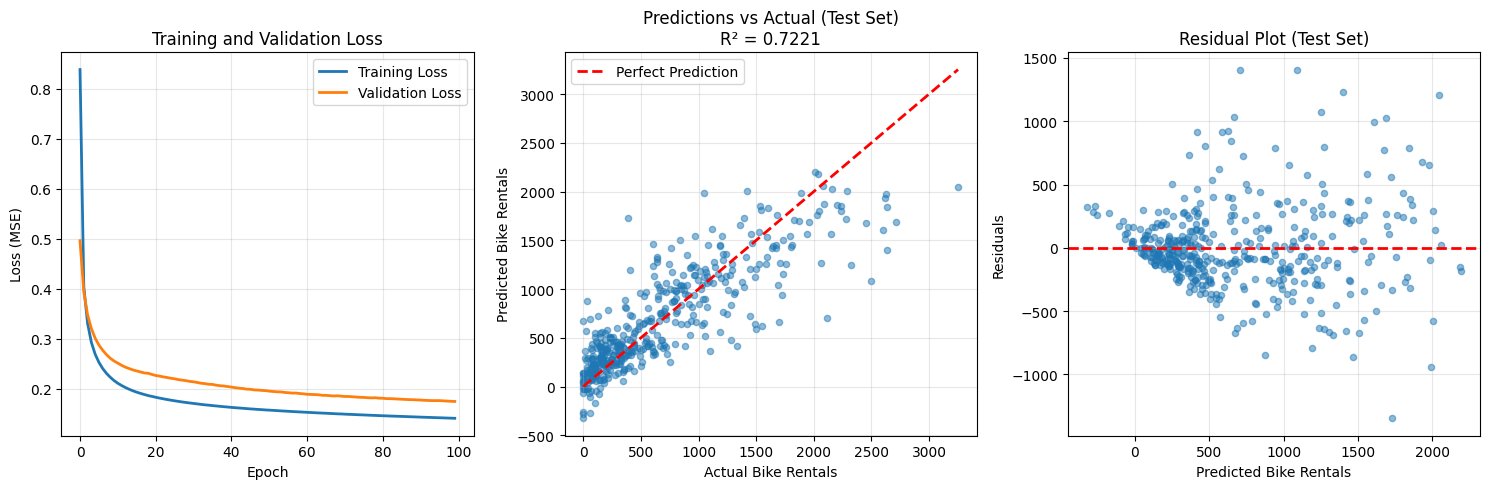

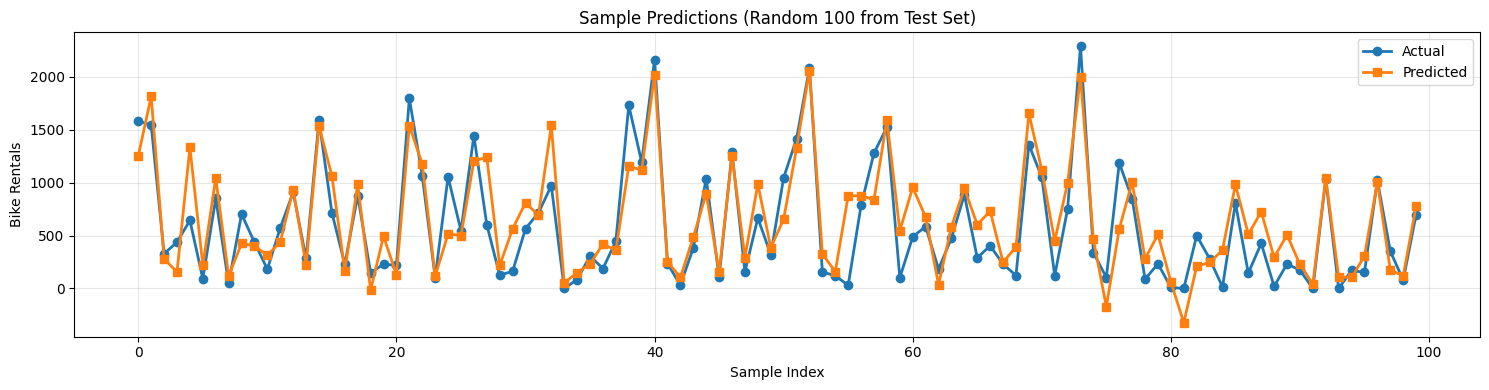


✓ Visualizations completed!


In [12]:
# ============================================================================
# VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("VISUALIZATION")
print("=" * 80)

# 1. Training History (Loss Curves)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(model.history['train_loss'], label='Training Loss', linewidth=2)
plt.plot(model.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Predictions vs Actual (Test Set)
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title(f'Predictions vs Actual (Test Set)\nR² = {test_metrics_orig["r2"]:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Residuals Plot
plt.subplot(1, 3, 3)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5, s=20)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Bike Rentals')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Sample Predictions
plt.figure(figsize=(15, 4))
n_samples = 100
sample_indices = np.random.choice(len(y_test), n_samples, replace=False)
sample_indices = np.sort(sample_indices)

plt.plot(y_test[sample_indices], 'o-', label='Actual', linewidth=2, markersize=6)
plt.plot(y_test_pred[sample_indices], 's-', label='Predicted', linewidth=2, markersize=6)
plt.xlabel('Sample Index')
plt.ylabel('Bike Rentals')
plt.title(f'Sample Predictions (Random {n_samples} from Test Set)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



print("\n✓ Visualizations completed!")

In [13]:

# ============================================================================
# STEP 7: MODEL SUMMARY AND ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("FINAL MODEL SUMMARY")
print("=" * 80)

print("\n" + "-" * 80)
print("Architecture Details")
print("-" * 80)
print(f"Network: {architecture}")
print(f"Total Layers: {model.num_layers}")
print(f"Total Parameters: {sum(p.size for p in model.parameters.values()):,}")

print("\n" + "-" * 80)
print("Training Configuration")
print("-" * 80)
print(f"Learning Rate: {model.learning_rate}")
print(f"Batch Size: {model.batch_size}")
print(f"Epochs Trained: {len(model.history['train_loss'])}")
print(f"Optimization: Vanilla SGD with mini-batches")
print(f"Initialization: He initialization (for ReLU)")

print("\n" + "-" * 80)
print("Final Performance (Original Scale)")
print("-" * 80)
print(f"Test RMSE: {test_metrics_orig['rmse']:.2f} bikes/hour")
print(f"Test MAE:  {test_metrics_orig['mae']:.2f} bikes/hour")
print(f"Test R²:   {test_metrics_orig['r2']:.4f}")

print("\n" + "-" * 80)
print("Model Interpretation")
print("-" * 80)
mean_actual = y_test.mean()
print(f"Mean bike rentals: {mean_actual:.2f} bikes/hour")
print(f"RMSE as % of mean: {(test_metrics_orig['rmse']/mean_actual)*100:.2f}%")
print(f"MAE as % of mean:  {(test_metrics_orig['mae']/mean_actual)*100:.2f}%")

# Prediction quality breakdown
errors = np.abs(y_test - y_test_pred).flatten()
within_10_percent = np.sum(errors <= 0.1 * y_test.flatten())
within_20_percent = np.sum(errors <= 0.2 * y_test.flatten())
total = len(y_test)

print(f"\nPrediction Quality:")
print(f"  Within 10% of actual: {within_10_percent}/{total} ({within_10_percent/total*100:.1f}%)")
print(f"  Within 20% of actual: {within_20_percent}/{total} ({within_20_percent/total*100:.1f}%)")

print("\n" + "=" * 80)
print("IMPLEMENTATION COMPLETE!")
print("=" * 80)


FINAL MODEL SUMMARY

--------------------------------------------------------------------------------
Architecture Details
--------------------------------------------------------------------------------
Network: [15, 64, 32, 16, 1]
Total Layers: 4
Total Parameters: 3,649

--------------------------------------------------------------------------------
Training Configuration
--------------------------------------------------------------------------------
Learning Rate: 0.001
Batch Size: 64
Epochs Trained: 100
Optimization: Vanilla SGD with mini-batches
Initialization: He initialization (for ReLU)

--------------------------------------------------------------------------------
Final Performance (Original Scale)
--------------------------------------------------------------------------------
Test RMSE: 335.58 bikes/hour
Test MAE:  237.87 bikes/hour
Test R²:   0.7221

--------------------------------------------------------------------------------
Model Interpretation
------------------


FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features:
                Feature  Importance
Solar Radiation (MJ/m2)    0.322609
       Wind speed (m/s)    0.306811
                Holiday    0.300507
           Rainfall(mm)    0.298838
          Season_Autumn    0.297729
          Season_Summer    0.296789
        Functioning Day    0.293859
          Snowfall (cm)    0.282003
                   Hour    0.274964
        Temperature(°C)    0.270903


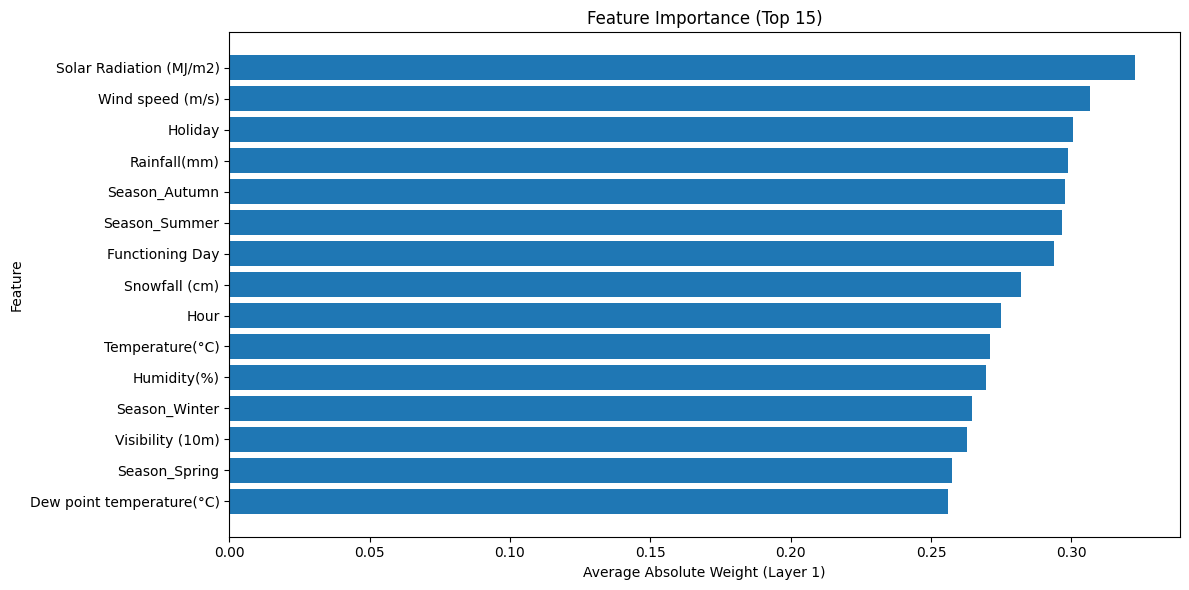


ALL ANALYSIS COMPLETE!


In [14]:
# ============================================================================
# OPTIONAL: FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Analyze first layer weights to understand feature importance
W1 = model.parameters['W1']
feature_importance = np.abs(W1).mean(axis=1)

# Create feature importance dataframe
feature_names = data.columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10).to_string(index=False))

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'].head(15), importance_df['Importance'].head(15))
plt.xlabel('Average Absolute Weight (Layer 1)')
plt.ylabel('Feature')
plt.title('Feature Importance (Top 15)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("ALL ANALYSIS COMPLETE!")
print("=" * 80)



## Extensions and Improvements

### Possible Enhancements:

1. **Architecture**:
   - Add more layers or neurons
   - Try different activation functions (Leaky ReLU, ELU)
   - Add skip connections (ResNet-style)

2. **Regularization**:
   - L2 weight decay: $J_{\text{reg}} = J + \frac{\lambda}{2}\sum_\ell \|\mathbf{W}^{(\ell)}\|^2$
   - Dropout: Randomly drop neurons during training
   - Batch normalization: Normalize activations

3. **Optimization**:
   - Adam optimizer: Adaptive learning rates
   - Learning rate scheduling: Decay over time
   - Momentum: Accelerate convergence

4. **Feature Engineering**:
   - Add cyclical encoding for hour: $\sin(2\pi h/24), \cos(2\pi h/24)$
   - Add lag features: Previous hour demand
   - Add rolling statistics: Moving averages

5. **Ensemble Methods**:
   - Train multiple models with different initializations
   - Average predictions for better generalization

---

## Conclusion

This exercise demonstrates a complete implementation of a Deep Feed-Forward Neural Network for regression. The DFNN successfully learns complex non-linear relationships between weather/temporal features and bike rental demand, significantly outperforming linear models. The implementation includes all essential components: forward propagation, backpropagation, mini-batch SGD, proper initialization, and comprehensive evaluation.

**Key Takeaways:**
- DFNNs extend linear models by adding hidden layers and non-linearity
- Backpropagation efficiently computes gradients through the chain rule
- Proper initialization and normalization are critical for training success
- Mini-batch SGD balances computational efficiency and convergence
- The model provides actionable predictions for smart city bike-sharing optimization

This foundational understanding prepares you for more advanced architectures like CNNs, RNNs, and Transformers!

---

**Author:** Seetha Parameswaran  
**Course:** Deep Neural Networks - BITS Pilani WILP  
**Module:** Deep Feed-Forward Neural Networks for Regression  
**Dataset:** Seoul Bike Sharing Demand (UCI ML Repository)